In [1]:
%local
from aws.finspace.cluster import FinSpaceClusterManager

# if this was already run, no need to run again
if 'finspace_clusters' not in globals():
    finspace_clusters = FinSpaceClusterManager()
    finspace_clusters.auto_connect()
else:
    print(f'connected to cluster: {finspace_clusters.get_connected_cluster_id()}')

Connecting to cluster - fin-cluster-f91c[exn4tj9k]
cleared existing credential location
Persisted krb5.conf secret to /etc/krb5.conf
re-establishing connection...
Persisted keytab secret to /home/sagemaker-user/livy.keytab
Authenticated to Spark cluster
Persisted sparkmagic config to /home/sagemaker-user/.sparkmagic/config.json
Started Spark cluster with clusterId: exn4tj9k
finished reloading all magics & configurations
Persisted finspace cluster connection info to /home/sagemaker-user/.sparkmagic/finspace_connection_info.json


In [2]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pyspark.sql.functions as F
import pyspark.sql.types as T

from aws.finspace.timeseries.spark.analytics import *
from aws.finspace.timeseries.spark.windows import *

from aws.finspace.timeseries.spark.util import string_to_timestamp_micros

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
#####----------------------------------------------------------
##### REPLACE WITH CORRECT IDS!
##### Dataset: "US Equity Time-Bar Summary - 1 min, 14 Symbols - Sample"
#####
#####----------------------------------------------------------
dataset_id    = "oq4xqh1"
view_id  = "7L2czXfhsRggiFFlX1132B"

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
from aws.finspace.analytics import FinSpaceAnalyticsManager
finspace = FinSpaceAnalyticsManager(spark = spark)

sumDF = finspace.read_data_view(dataset_id = dataset_id, data_view_id = view_id)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
sumDF.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['date', 'symbologyid', 'companyname', 'ticker', 'region', 'totalpositivecount', 'totalnegativecount', 'totalcountdailyscore', 'totalweightedpositivecount', 'totalweightednegativecount', 'totalweightedcountdailyscore', 'kdgovernancepositivecount', 'kdgovernancenegativecount', 'kdgovernancecountdailyscore', 'kdgovernanceweightedpositivecount', 'kdgovernanceweightednegativecount', 'kdgovernanceweightedcountdailyscore', 'kdsocialpositivecount', 'kdsocialnegativecount', 'kdsocialcountdailyscore', 'kdsocialweightedpositivecount', 'kdsocialweightednegativecount', 'kdsocialweightedcountdailyscore', 'kdgeneralpositivecount', 'kdgeneralnegativecount', 'kdgeneralcountdailyscore', 'kdgeneralweightedpositivecount', 'kdgeneralweightednegativecount', 'kdgeneralweightedcountdailyscore', 'kdenvironmentalpositivecount', 'kdenvironmentalnegativecount', 'kdenvironmentalcountdailyscore', 'kdenvironmentalweightedpositivecount', 'kdenvironmentalweightednegativecount', 'kdenvironmentalweightedcountdailyscore

In [32]:
# What is the date range for the data?
sumDF.select(F.min(sumDF.date).alias("MIN"), F.max(sumDF.date).alias("MAX")).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------+
|       MIN|       MAX|
+----------+----------+
|2018-01-01|2020-09-01|
+----------+----------+

In [33]:
sumDF.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

696150

In [34]:
list_of_restaurants = ["ARMK", "ARCO", "ARKR", "BBQ", "BH", "BJRI", "BLMN", "EAT", "TAST", "CAKE", "CMG", "CHUY", "539436", "7616", "CPG", "CBRL", "DRI", "PLAY", "TACO", "DENN", "DIN", "DMP", "DOM", "DPZ", "LOCO", "ELIOR", "FBR", "FAT", "FRGI", "FRII", "GTIM", "2723", "GPL", "GRG", "6862", "MEAL3", "IPIC", "JAX", "JACK", "JFC", "533155", "KONA", "LUB", "LKNCY", "MARS", "MCD", "2702", "MAB", "MTY", "NATH", "NDLS", "9936", "PZZA", "PZA", "PBPB", "RAVE", "RRGB", "QSR", "RBD", "RFG", "RUTH", "SHAK", "3197", "SW", "SSPG", "SBUX", "TXRH", "STKS", "RTN", "WEN", "VAO", "505533", "WING", "9861", "YUMC", "YUM"]

df = sumDF.filter(sumDF.ticker.isin(list_of_restaurants))
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8775

In [ ]:
# What tickers are in this dataset?
#pdf = sumDF.groupBy("ticker").count().orderBy('ticker')
#pdf.filter(pdf['count']>1900).show()

In [ ]:
#min/max number of rows
#pdf.select(F.min(pdf['count']).alias("MIN"), F.max(pdf['count']).alias("MAX")).show()

In [35]:
#create one df per year
sDate = dt.datetime(2018, 1, 1)
eDate = dt.datetime(2018, 12, 31)

df18 = ( df.filter( df.date.between(sDate, eDate) ) )

sDate = dt.datetime(2019, 1, 1)
eDate = dt.datetime(2019, 12, 31)

df19 = ( df.filter( df.date.between(sDate, eDate) ) )

sDate = dt.datetime(2020, 1, 1)
eDate = dt.datetime(2020, 9, 1)

df20 = ( df.filter( df.date.between(sDate, eDate) ) )


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
#count restaurants in df 2018 
df18.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3285

In [37]:
#count restaurants in df 2019 
df19.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3285

In [38]:
#count restaurants in df 2020 
df20.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2205

In [39]:
# What tickers are in this dataset?
df18.groupBy("ticker").count().orderBy('ticker').show()
df19.groupBy("ticker").count().orderBy('ticker').show()
df20.groupBy("ticker").count().orderBy('ticker').show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-----+
|ticker|count|
+------+-----+
|   CMG|  365|
|   CPG|  365|
|   DOM|  365|
|   DPZ|  365|
|   DRI|  365|
|   MCD|  365|
|  SBUX|  365|
|    SW|  365|
|   YUM|  365|
+------+-----+

+------+-----+
|ticker|count|
+------+-----+
|   CMG|  365|
|   CPG|  365|
|   DOM|  365|
|   DPZ|  365|
|   DRI|  365|
|   MCD|  365|
|  SBUX|  365|
|    SW|  365|
|   YUM|  365|
+------+-----+

+------+-----+
|ticker|count|
+------+-----+
|   CMG|  245|
|   CPG|  245|
|   DOM|  245|
|   DPZ|  245|
|   DRI|  245|
|   MCD|  245|
|  SBUX|  245|
|    SW|  245|
|   YUM|  245|
+------+-----+

In [41]:
from pyspark.sql.functions import to_date, col, month
df18r = df18.withColumn("date", to_date(col("date"), "d/MM/yyyy"))\
    .withColumn('month', month("date"))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
df18r = df18r.groupBy("month").mean("totalpositivecount").orderBy("month")
df18r.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----------------------+
|month|avg(totalpositivecount)|
+-----+-----------------------+
|    1|     1.2508960573476702|
|    2|     0.3888888888888889|
|    3|      2.175627240143369|
|    4|     2.3703703703703702|
|    5|     3.4695340501792113|
|    6|      0.825925925925926|
|    7|     1.1827956989247312|
|    8|     0.7240143369175627|
|    9|     1.1703703703703703|
|   10|     0.2867383512544803|
|   11|     0.4148148148148148|
|   12|    0.43727598566308246|
+-----+-----------------------+

In [43]:
df19r = df19.withColumn("date", to_date(col("date"), "d/MM/yyyy"))\
    .withColumn('month', month("date"))

df19r = df19r.groupBy("month").mean("totalpositivecount").orderBy("month")
df19r.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----------------------+
|month|avg(totalpositivecount)|
+-----+-----------------------+
|    1|    0.16129032258064516|
|    2|    0.35714285714285715|
|    3|     0.7562724014336918|
|    4|     0.6777777777777778|
|    5|     1.8351254480286738|
|    6|     1.8037037037037038|
|    7|     0.7526881720430108|
|    8|     1.0465949820788532|
|    9|      1.137037037037037|
|   10|     1.4551971326164874|
|   11|       5.32962962962963|
|   12|     2.5913978494623655|
+-----+-----------------------+

In [44]:
df20r = df20.withColumn("date", to_date(col("date"), "d/MM/yyyy"))\
    .withColumn('month', month("date"))

df20r = df20r.groupBy("month").mean("totalpositivecount").orderBy("month")
df20r.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----------------------+
|month|avg(totalpositivecount)|
+-----+-----------------------+
|    1|      4.698924731182796|
|    2|     1.4904214559386972|
|    3|      2.652329749103943|
|    4|      4.703703703703703|
|    5|      1.906810035842294|
|    6|      6.466666666666667|
|    7|      5.275985663082437|
|    8|      4.315412186379929|
|    9|     28.666666666666668|
+-----+-----------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

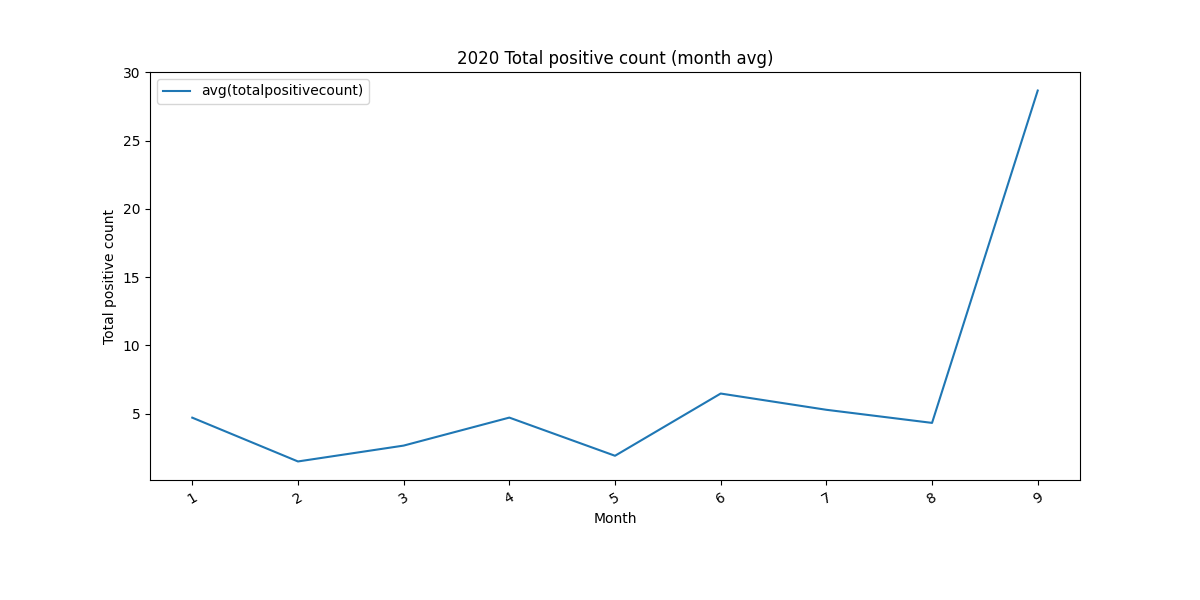

In [45]:
# filter and bring data into a pandas dataframe for plotting
pltDF = (df20r.select( 'month', 'avg(totalpositivecount)')
).toPandas()

pltDF = pltDF.set_index('month')


fig, ax = plt.subplots(1, 1, figsize=(12, 9))

pltDF[["avg(totalpositivecount)"]].plot(figsize=(12,6))

# Let's configure plot labels
plt.title("2020 Total positive count (month avg)")
plt.ylabel('Total positive count')
plt.xlabel('Month')
plt.xticks(rotation=30)
plt.subplots_adjust(bottom=0.2)

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

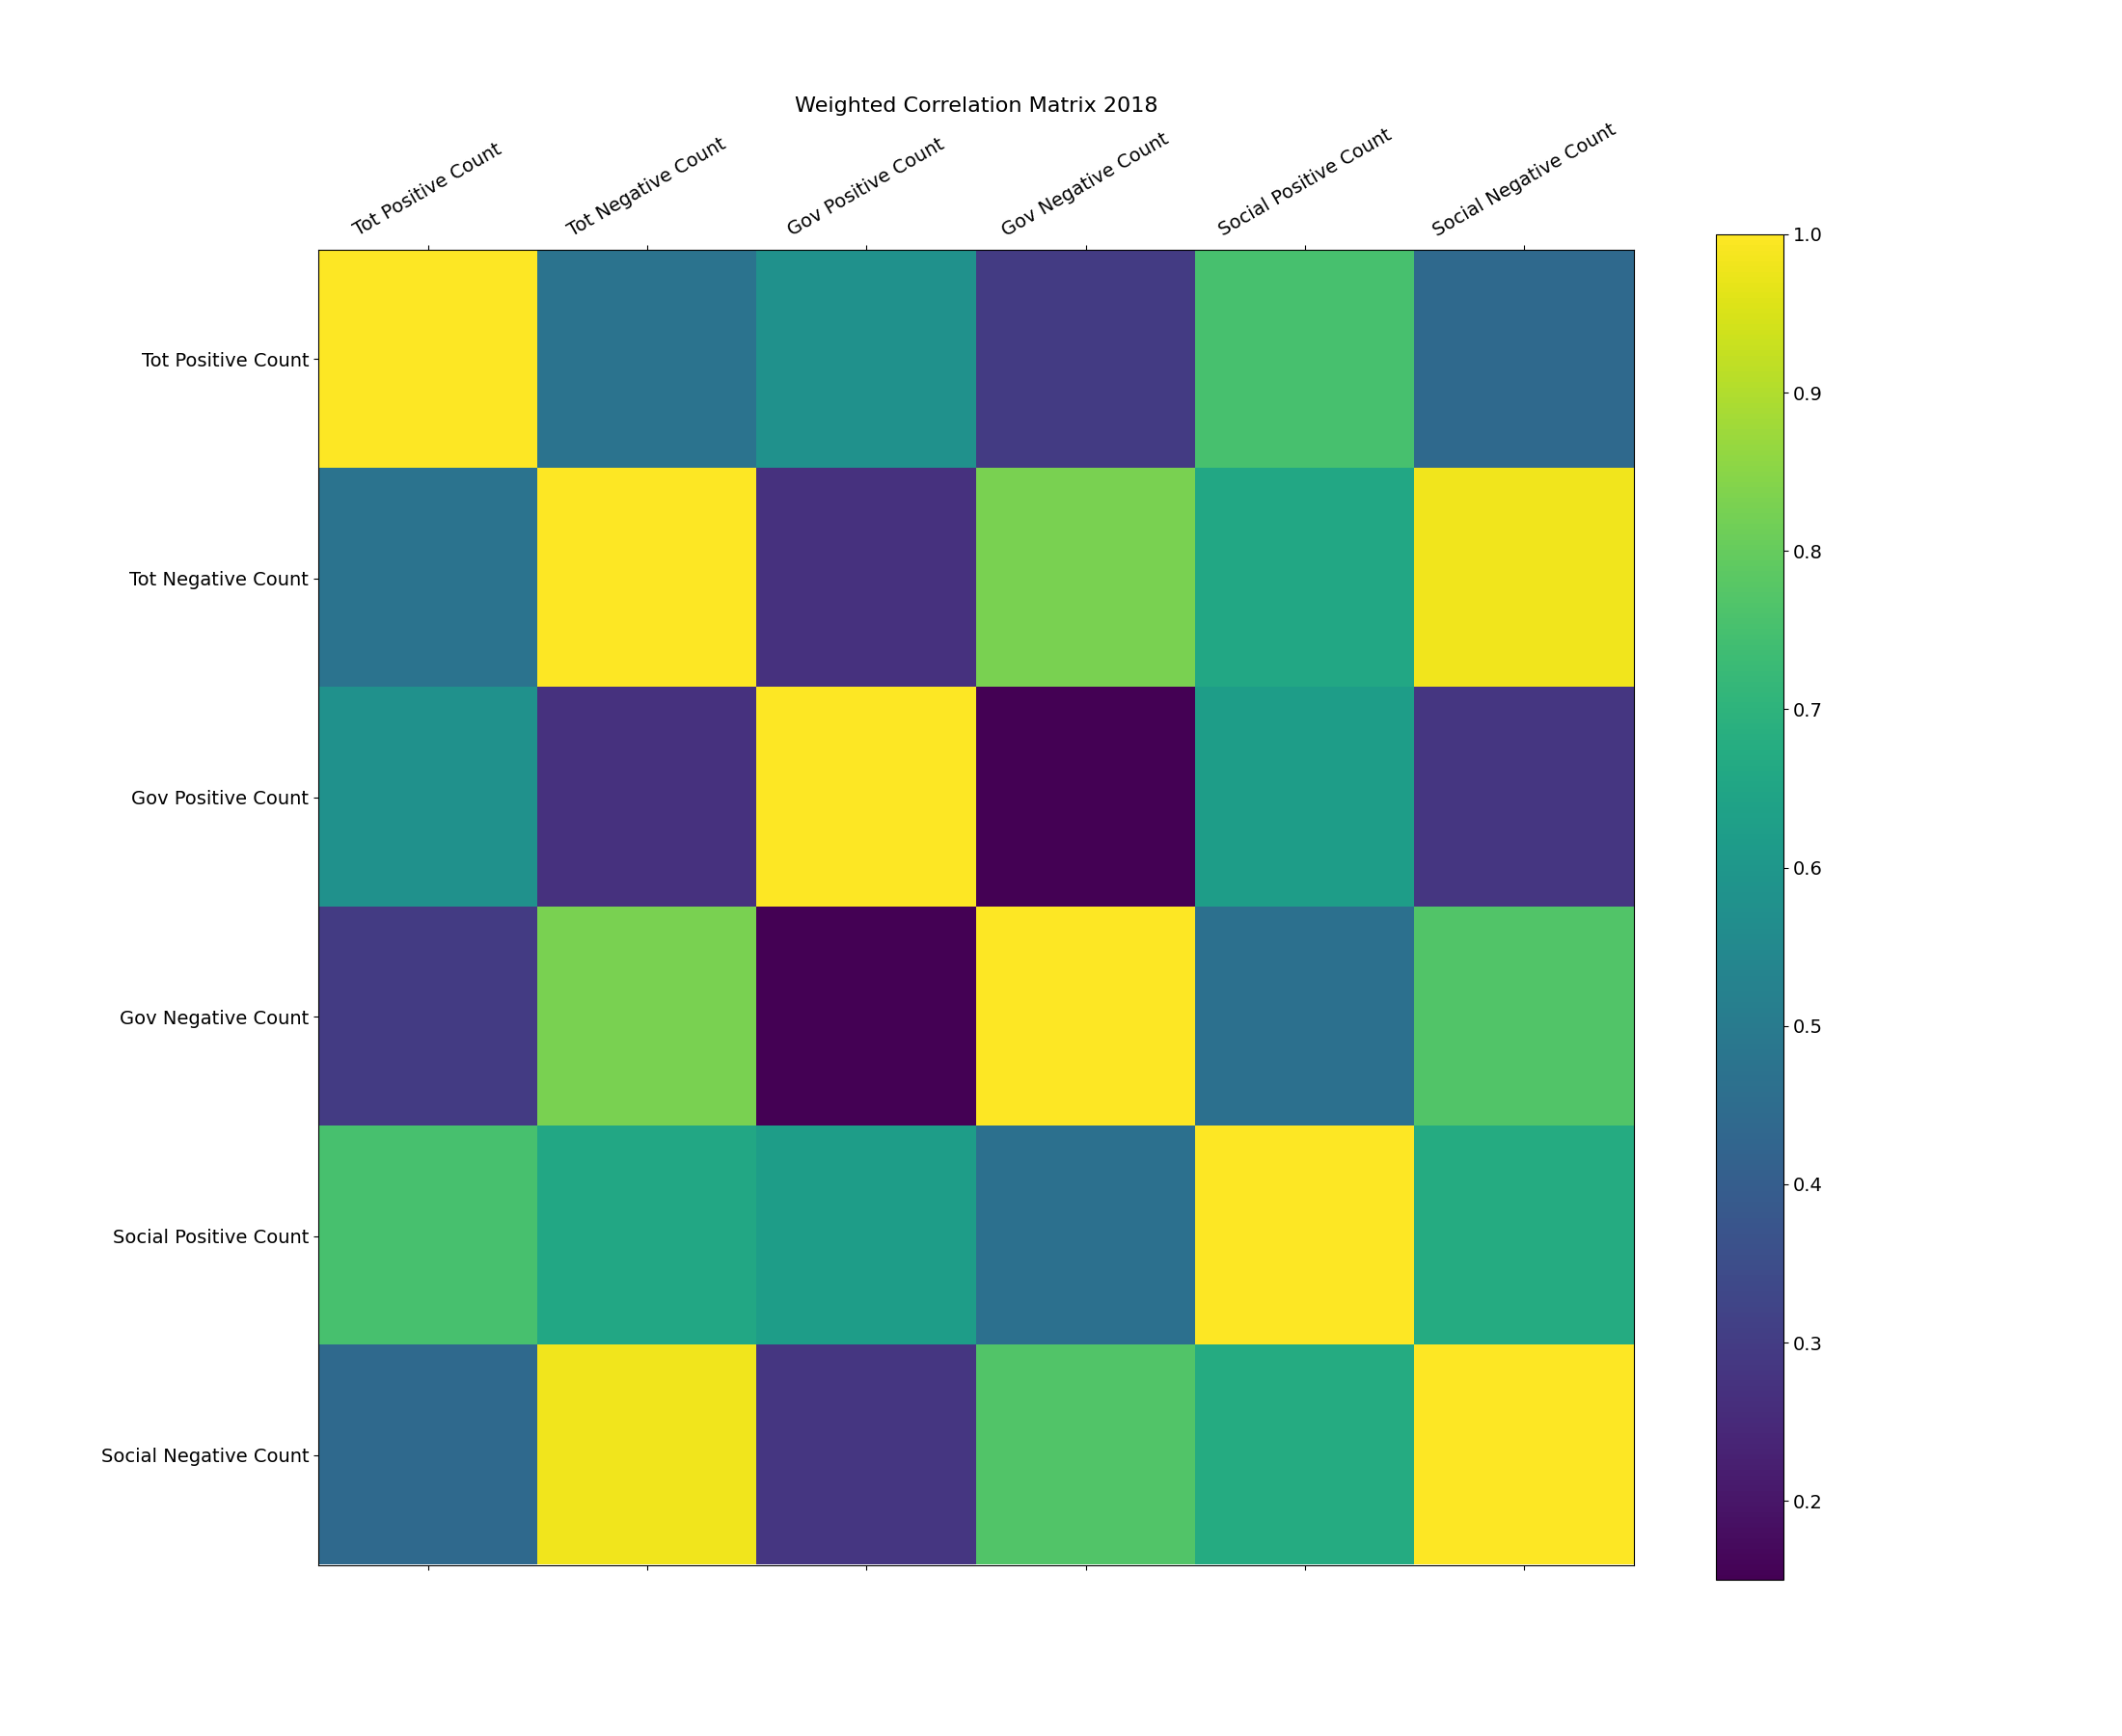

In [47]:
pltDF = ( df18
    .select( 'totalWeightedPositiveCount', 'totalWeightedNegativeCount', 'kdGovernanceWeightedPositiveCount', 'kdGovernanceWeightedNegativeCount', 'kdSocialWeightedPositiveCount', 'kdSocialWeightedNegativeCount' )
).toPandas()


f = plt.figure(figsize=(22, 18))
corr = pltDF.corr()
#pltDF.style

cols = ['Tot Positive Count', 'Tot Negative Count', 'Gov Positive Count', 'Gov Negative Count', 'Social Positive Count', 'Social Negative Count']

plt.matshow(corr, fignum=f.number)
plt.xticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14, rotation=30)
plt.yticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Weighted Correlation Matrix 2018', fontsize=16);

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

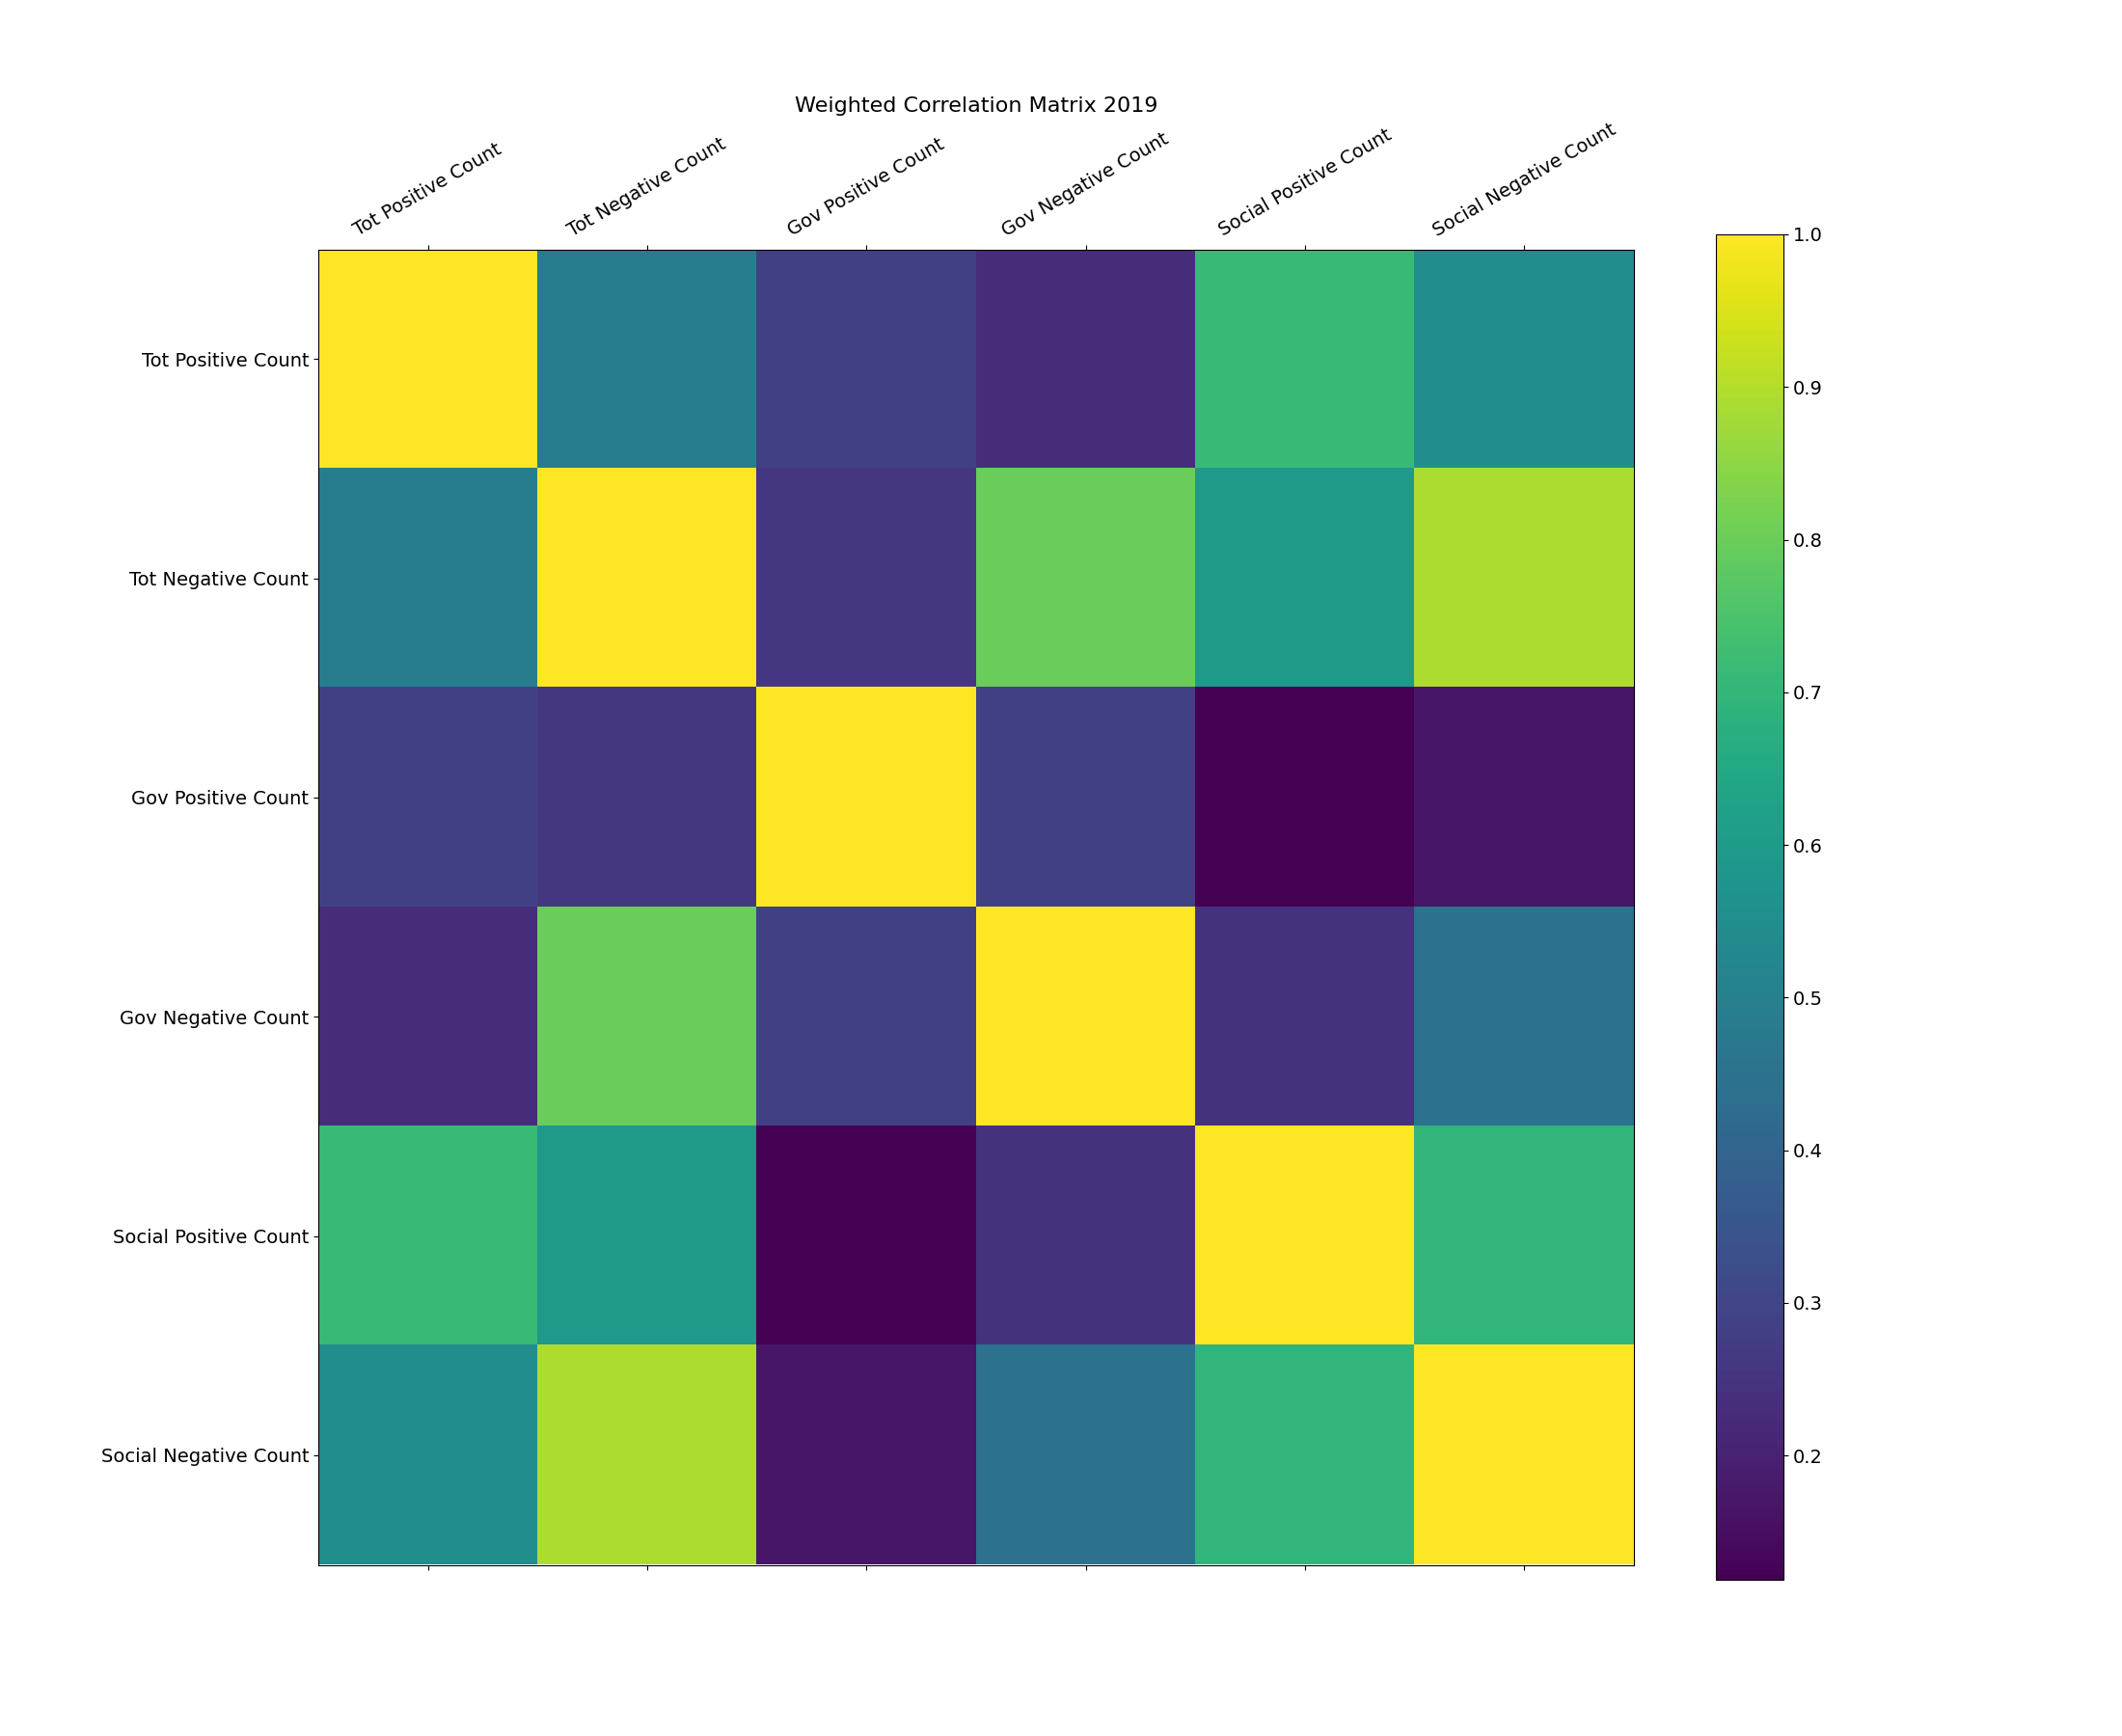

In [48]:
pltDF = ( df19
    .select( 'totalWeightedPositiveCount', 'totalWeightedNegativeCount', 'kdGovernanceWeightedPositiveCount', 'kdGovernanceWeightedNegativeCount', 'kdSocialWeightedPositiveCount', 'kdSocialWeightedNegativeCount')
).toPandas()



f = plt.figure(figsize=(22, 18))
corr = pltDF.corr()


cols = ['Tot Positive Count', 'Tot Negative Count', 'Gov Positive Count', 'Gov Negative Count', 'Social Positive Count', 'Social Negative Count']

plt.matshow(corr, fignum=f.number)
plt.xticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14, rotation=30)
plt.yticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Weighted Correlation Matrix 2019', fontsize=16);

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

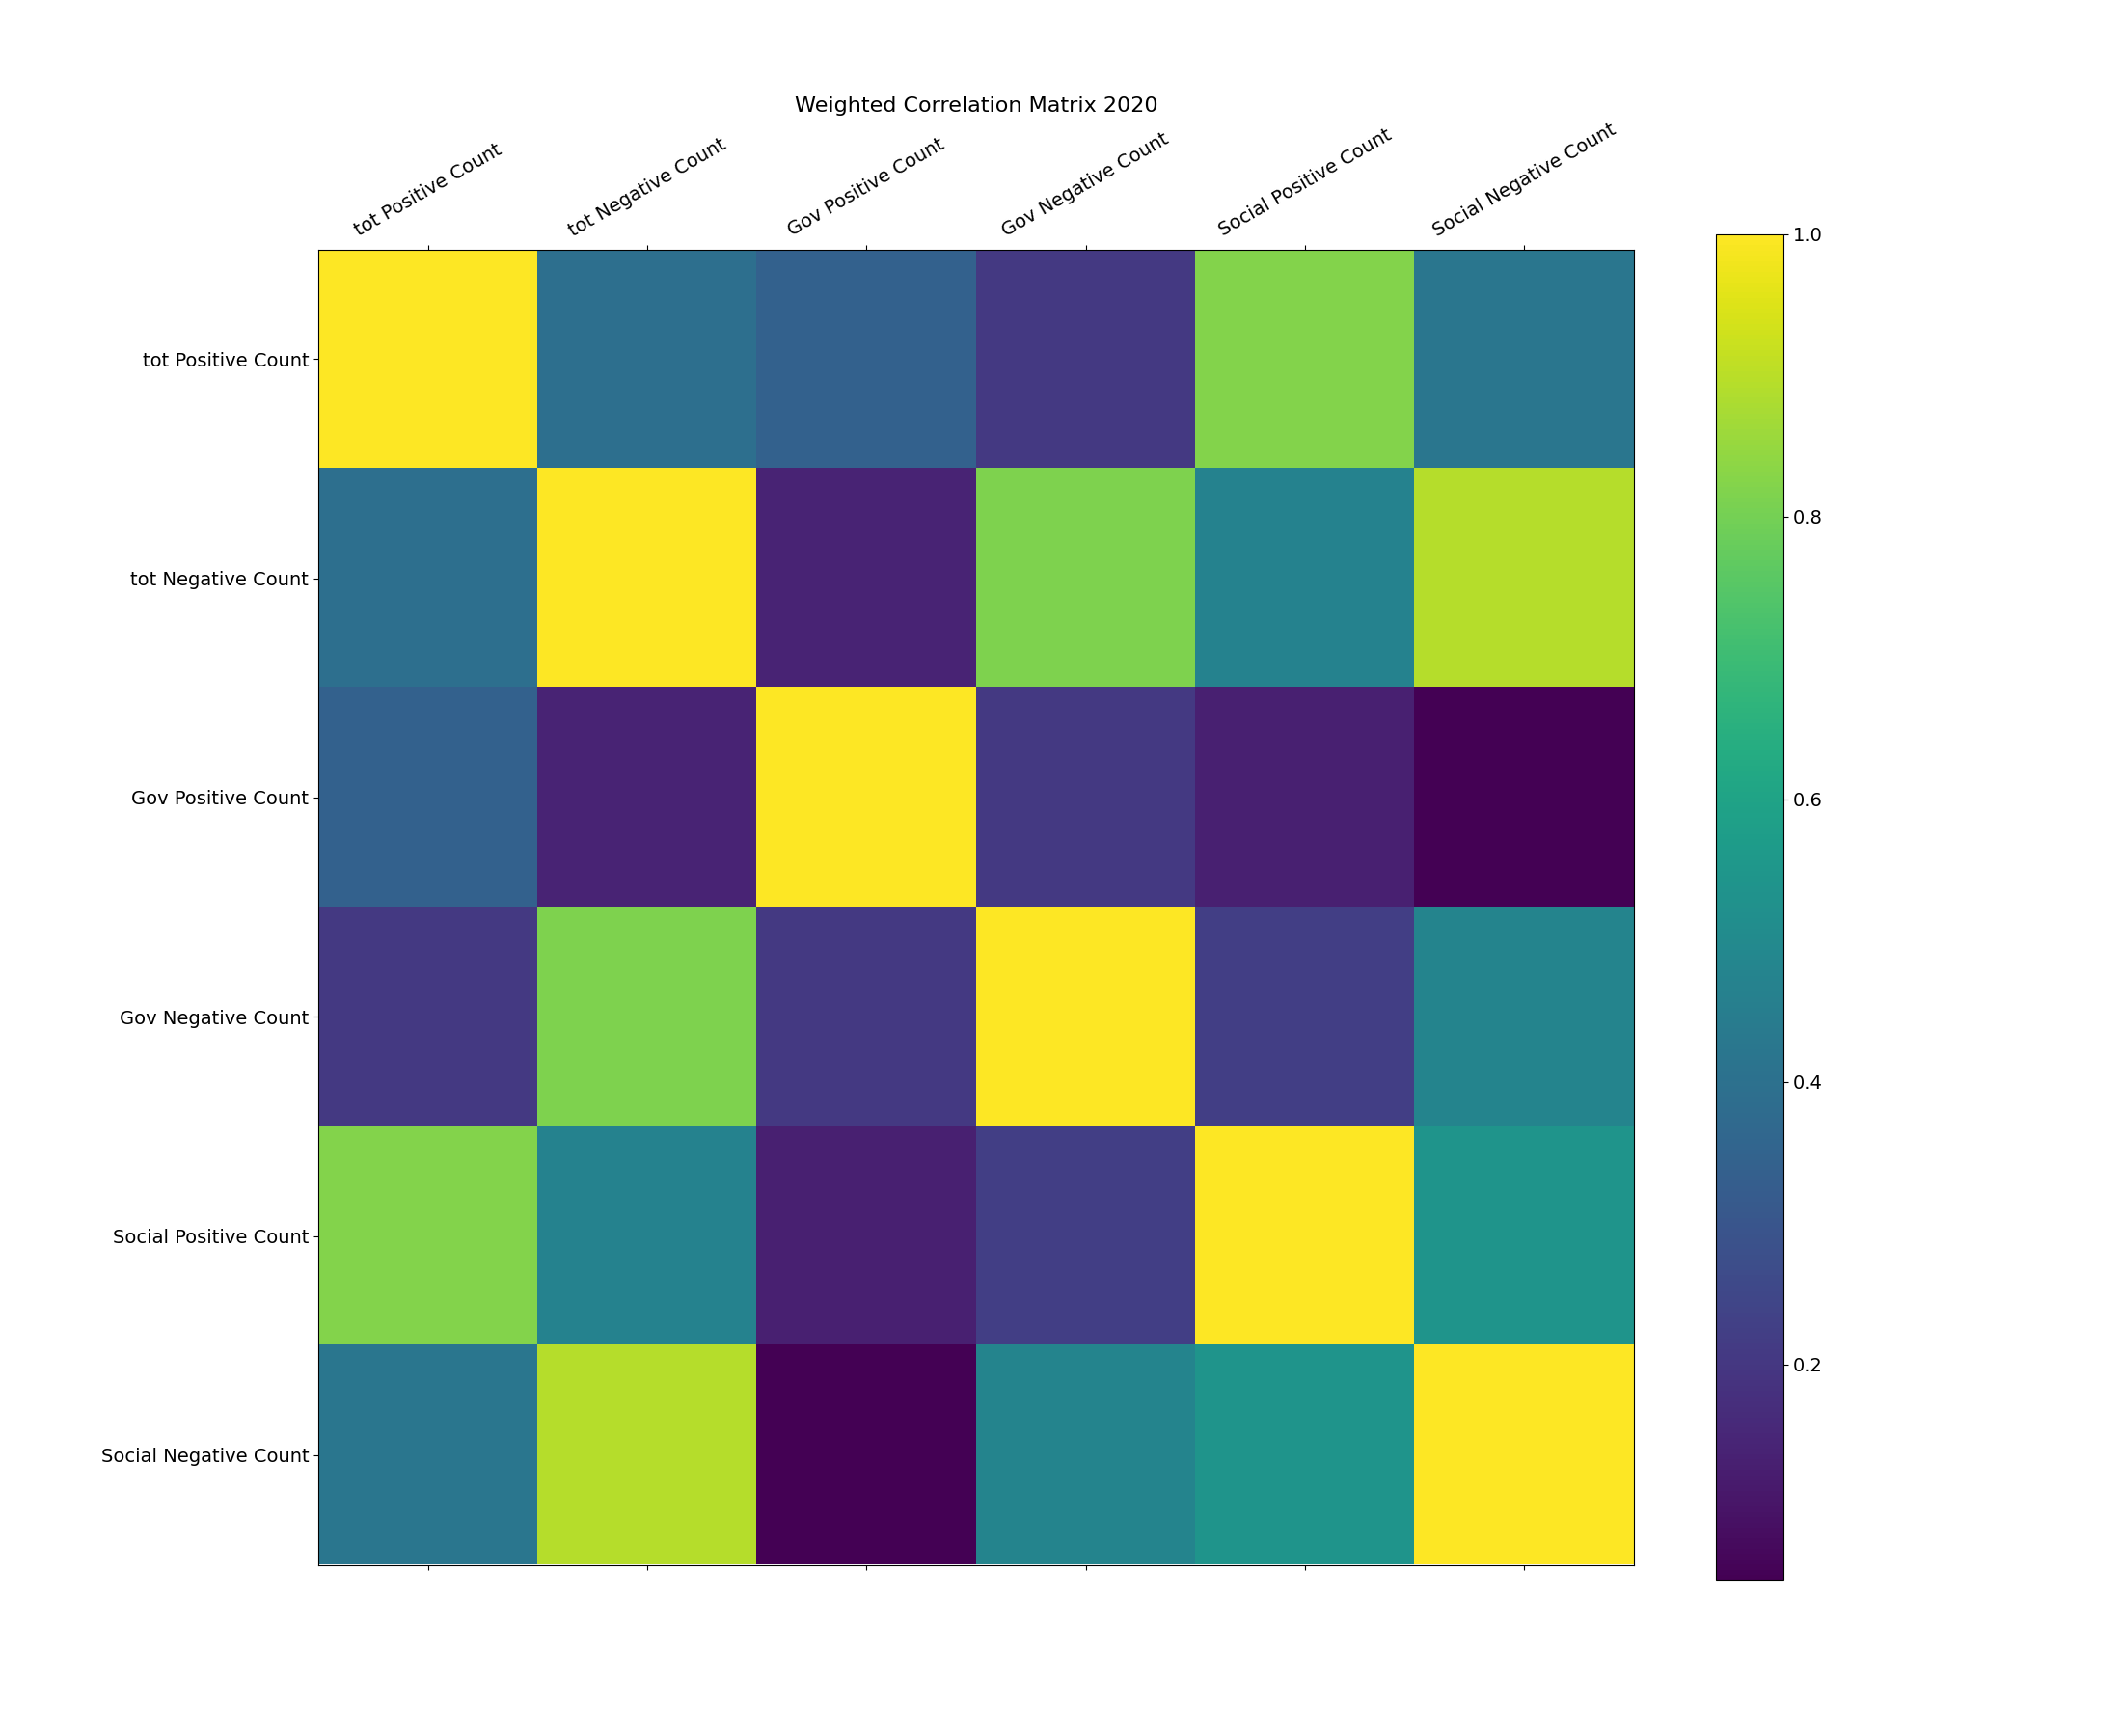

In [49]:
pltDF = ( df20
    .select( 'totalWeightedPositiveCount', 'totalWeightedNegativeCount', 'kdGovernanceWeightedPositiveCount', 'kdGovernanceWeightedNegativeCount', 'kdSocialWeightedPositiveCount', 'kdSocialWeightedNegativeCount')
).toPandas()



f = plt.figure(figsize=(22, 18))
corr = pltDF.corr()

cols = ['tot Positive Count', 'tot Negative Count', 'Gov Positive Count', 'Gov Negative Count', 'Social Positive Count', 'Social Negative Count']

plt.matshow(corr, fignum=f.number)
plt.xticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14, rotation=30)
plt.yticks(range(pltDF.select_dtypes(['number']).shape[1]), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Weighted Correlation Matrix 2020', fontsize=16);

%matplot plt